#### 1.- Librerias

In [ ]:
# Instalar libreias
# !pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.5 MB/s eta 0:00:00


In [ ]:
#-----------------------------------
# Library import
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import xarray as xr
import numpy as np
#import netCDF4
import os
#----------------------------------

In [ ]:
#-----------------------------------
# Montar carpeta contenedor de datos
from google.colab import drive
drive.mount('/content/drive')

#-----------------------------------

Mounted at /content/drive


In [ ]:
#----------------------------------
# Data
#path = "/Volumes/GoogleDrive-101458676915921006746/Mi unidad/WRF_Chem/datos_WRF/"
path = "drive/MyDrive/WRF_Chem/datos_WRF/"

#---------------------------------
image_nc15k = xr.open_dataset(path+"wrfout_d01_2023-11-08_00:00:00")
image_nc3k  = xr.open_dataset(path+"wrfout_d02_2023-11-08_00:00:00")
#print(image_nc)
#---------------------------------

In [ ]:

image_nc15k.info()

xarray.Dataset {
dimensions:
	Time = 1 ;
	bottom_top = 44 ;
	south_north = 88 ;
	west_east = 58 ;
	bio_emissions_dimension_stag = 158 ;
	klevs_for_dvel = 1 ;
	bottom_top_stag = 45 ;
	soil_layers_stag = 4 ;
	west_east_stag = 59 ;
	south_north_stag = 89 ;
	seed_dim_stag = 8 ;

variables:
	|S19 Times(Time) ;
	float32 AOD_OUT(Time, bottom_top, south_north, west_east) ;
		AOD_OUT:FieldType = 104 ;
		AOD_OUT:MemoryOrder = XYZ ;
		AOD_OUT:description = Aerosol Optical Depth ;
		AOD_OUT:units =  ;
		AOD_OUT:stagger =  ;
	float32 AOD2D_OUT(Time, south_north, west_east) ;
		AOD2D_OUT:FieldType = 104 ;
		AOD2D_OUT:MemoryOrder = XY  ;
		AOD2D_OUT:description = Aerosol Optical Depth, 2d ;
		AOD2D_OUT:units =  ;
		AOD2D_OUT:stagger =  ;
	float32 ATOP2D_OUT(Time, south_north, west_east) ;
		ATOP2D_OUT:FieldType = 104 ;
		ATOP2D_OUT:MemoryOrder = XY  ;
		ATOP2D_OUT:description = Aerosol Optical Depth, top ;
		ATOP2D_OUT:units =  ;
		ATOP2D_OUT:stagger =  ;
	float32 ICN_DIAG(Time, bottom_top, south_nor

#### 2.- Plot de variable

In [ ]:
nc_dataT = image_nc15k["T2"]
nc_dataT2 = image_nc3k["T2"]


In [ ]:
# Extract variables and coordinates
variable = image_nc15k["T2"]

lat = nc_dataT.coords['XLAT']
lon = nc_dataT.coords['XLONG']

## Create a contour plot
#plt.contourf(lon, lat, variable, cmap='viridis')
#plt.colorbar(label='Variable Units')  # Adjust the label as needed
## Add labels and title
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.title('Contour Plot of Variable from NetCDF')
## Show the plot
#plt.show()

In [ ]:
variable = fnc.variables['variable'][xs, ys] # be careful of your index order

<xarray.DataArray 'XLAT' (Time: 1, south_north: 88, west_east: 58)>
array([[[-13.094101, -13.092949, ..., -13.177979, -13.182228],
        [-13.007195, -13.006042, ..., -13.091301, -13.095551],
        ...,
        [ -5.143021,  -5.141571, ...,  -5.247902,  -5.25322 ],
        [ -5.044762,  -5.043289, ...,  -5.14991 ,  -5.155243]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -13.09 -13.09 ... -5.155
    XLONG    (Time, south_north, west_east) float32 -80.11 -80.02 ... -74.61
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [ ]:
# Specify coordinates of interest

lat = -9.5  # Replace with the latitude you're interested in
lon = -77.5  # Replace with the longitude you're interested in

# Extract values based on coordinates
values_at_coordinates = image_nc15k['T2'].sel(south_north=lat, west_east=lon).values

Text(0, 0.5, 'Latitud')

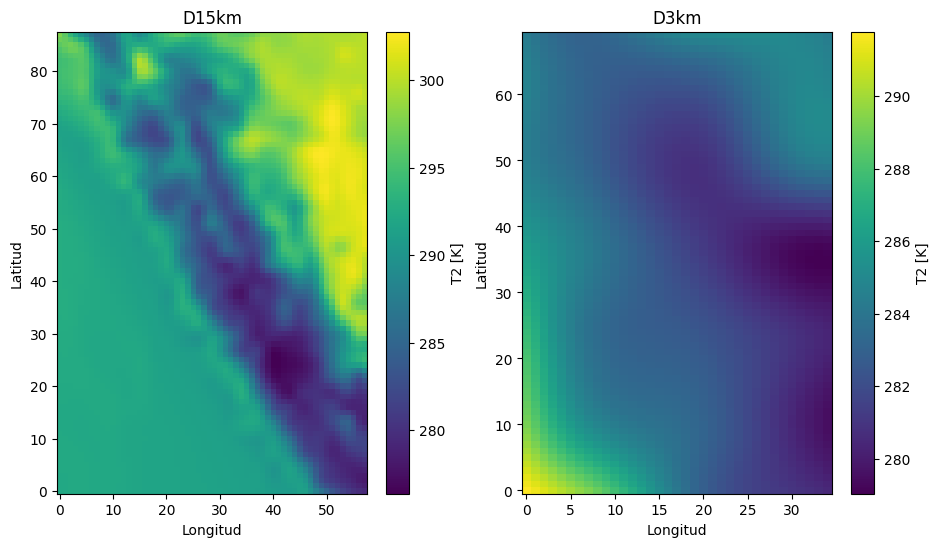

In [ ]:
plt.figure(figsize=[11,6])
#---------------------------------------------------------
plt.subplot(1,2,1)
diff = nc_dataT
diff.plot(vmin=np.min(nc_dataT), vmax=np.max(nc_dataT))
# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------
plt.subplot(1,2,2)
diff = nc_dataT2
diff.plot(vmin=np.min(nc_dataT2), vmax=np.max(nc_dataT2))
# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------


#### 3.- Extrac de value

In [ ]:
# https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
nc_file = path+"wrfout_d01_2023-11-08_00:00:00"
variable_name = "T2"
#---------------------------------------------
ds = xr.open_dataset(nc_file)
variable = ds[variable_name]
#---------------------------------------------
x_coord =  -77.5  #
y_coord =  -9.5   #

x_index = np.abs(variable['XLONG'] - x_coord).argmin().item()
y_index = np.abs(variable['XLAT'] - y_coord).argmin().item()

print(x_index)
print(y_index)
#---------------------------------------------
#variable.isel(south_north=y_index, west_east=x_index).item()
#print(variable[0, 0, 0 ].values)
#print(variable.values[0][0][0])
#print(variable.shape)
#---------------------------------------------

1015
2430


In [ ]:
#('Time', 'south_north', 'west_east')

#print("Longitude :", variable['XLONG'].values)
#print("Latitude  :", variable['XLAT'].values)

# Close the xarray dataset
len(variable['XLONG'].values[0][0])



58

In [ ]:
np.abs(variable['XLAT'] + y_coord).argmin().item()


5058

In [ ]:


def get_xarray_value_at_coordinate(nc_file, variable_name, x_coord, y_coord):
    # Open the NetCDF file using xarray
    ds = xr.open_dataset(nc_file)

    # Select the variable
    variable = ds[variable_name]

    # Find the nearest indices for the given coordinates
    x_index = np.abs(variable['XLONG'] - x_coord).argmin().item()
    y_index = np.abs(variable['XLAT'] - y_coord).argmin().item()

    # Extract the value at the specified indices
    value = variable.isel(south_north=x_index, west_east=y_index).item()
    print(value)

    # Close the xarray dataset
    ds.close()

    return value



# Aplicar funcion
nc_file_path = path+"wrfout_d01_2023-11-08_00:00:00"
variable_name = "T2"

x_coordinate =  -77.5  # Replace with your actual X coordinate
y_coordinate =  -9.5   # Replace with your actual Y coordinate

value_at_coordinate = get_xarray_value_at_coordinate(nc_file_path, variable_name, x_coordinate, y_coordinate)

print(f"xarray value at ({x_coordinate}, {y_coordinate}): {value_at_coordinate}")


IndexError: index 1015 is out of bounds for axis 0 with size 88